# AD-Toolkit sample usages

In [ ]:
! pip install "git+https://github.com/pbudzyns/ad_toolkit.git"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from ad_toolkit.datasets import NabDataset, MNIST
from ad_toolkit.detectors import AutoEncoder, VariationalAutoEncoder
from ad_toolkit.evaluation import Result

%matplotlib inline

## Time-series anomaly detection

### Load and show sample time-series from NAB

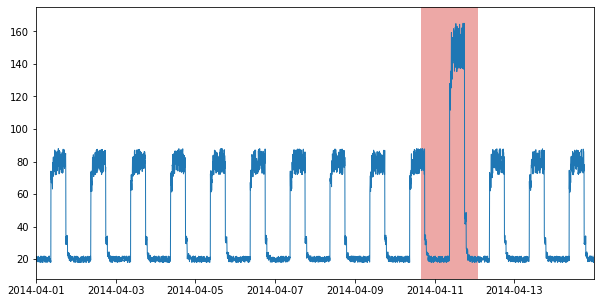

In [2]:
nab = NabDataset()
ax, fig = nab.plot()
plt.show()

### Train the AutoEncoder model on sample data

In [3]:
# Get train samples.
x_train, _ = nab.get_train_samples(standardize=True)

# Define and train the model.
model = VariationalAutoEncoder(window_size=100, layers=(64,32,16), latent_size=8)
model.train(x_train, epochs=20, learning_rate=1e-4)

### Model evaluation and result presentation

Result(accuracy=0.94,
	(tp, fp, tn, fn)=(149, 0, 3629, 254),
	precision=1.0,
	recall=0.37,
	f1=0.54,
	roc_auc=0.68,
	y_pred%=0.03695436507936508,
	y_label%=0.09995039682539683,
)


[]

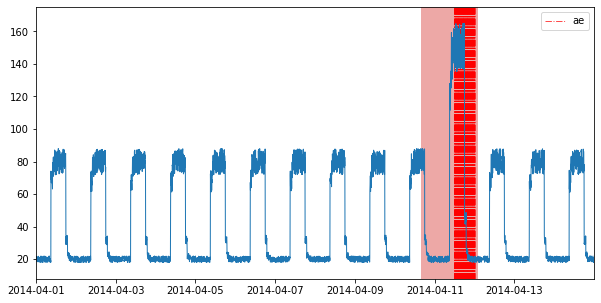

In [4]:
# Get data and labels for prediction.
x, y = nab.get_test_samples()
scores = model.predict(x)

# Apply arbitrary threshold on the prediction scores.
labels = (scores > np.mean(scores)*2.2)

# Show classification results and plot anomalies.
print(Result(labels, y))
_ = nab.plot(
    anomalies={'ae': labels}, 
    show_legend=True, 
    anomaly_style_kwargs={'lw': 1, 'alpha': 0.7},
)
plt.plot()

## MNIST Outliers Detection

### Load MNIST dataset

In [5]:
mnist = MNIST(anomaly_class=0)
x_train = mnist.get_train_samples(n_samples=5000)

### Fit the VAE model

In [6]:
ae = AutoEncoder(window_size=1, layers=(512, 256, 128, 128, 64), latent_size=32)
ae.train(x_train, epochs=30, learning_rate=1e-3, verbose=True)

Epoch 0 train_loss: 0.10826100409030914, valid_loss: 0.10946096296047235
Epoch 1 train_loss: 0.10577154159545898, valid_loss: 0.10604305125095627
Epoch 2 train_loss: 0.09368476271629333, valid_loss: 0.10231564479408325
Epoch 3 train_loss: 0.08980274200439453, valid_loss: 0.09804779658843944
Epoch 4 train_loss: 0.09469795227050781, valid_loss: 0.09322040068445267
Epoch 5 train_loss: 0.08348888158798218, valid_loss: 0.08797411780272212
Epoch 6 train_loss: 0.0849660336971283, valid_loss: 0.08250345328411499
Epoch 7 train_loss: 0.08060251921415329, valid_loss: 0.07723131413003068
Epoch 8 train_loss: 0.07443344593048096, valid_loss: 0.07294183795328264
Epoch 9 train_loss: 0.0712035521864891, valid_loss: 0.071508104828271
Epoch 10 train_loss: 0.06879734247922897, valid_loss: 0.07550713758577
Epoch 11 train_loss: 0.07239649444818497, valid_loss: 0.07381877216038765
Epoch 12 train_loss: 0.07036630809307098, valid_loss: 0.07149065102075601
Epoch 13 train_loss: 0.06716469675302505, valid_loss: 0

### Detecting outliers in MNIST

In [9]:
x_test, y_test = mnist.get_test_samples(n_samples=100)
y_pred = ae.predict(x_test)

# Apply arbitrary threshold on the prediction scores.
labels = (y_pred > np.mean(y_pred)*1.5)

# Show classification results and plot anomalies.
print(Result(labels, y_test))

Result(accuracy=0.93,
	(tp, fp, tn, fn)=(7, 2, 86, 5),
	precision=0.78,
	recall=0.58,
	f1=0.67,
	roc_auc=0.78,
	y_pred%=0.09,
	y_label%=0.12,
)


### Present the results

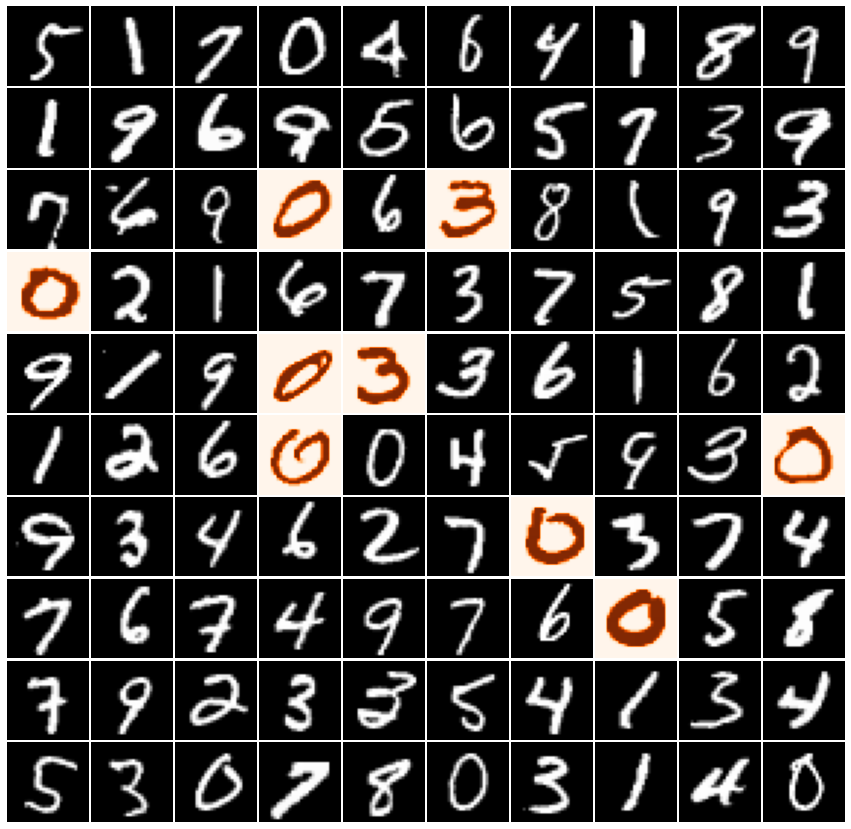

In [10]:
n_rows, n_cols = 10, 10
images = [x.values.reshape((28,28)) for _, x in x_test.iterrows()]

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,15))
for idx, (image, label) in enumerate(zip(images, labels)):
    row = idx // n_rows
    col = idx % n_cols
    axes[row, col].axis("off")
    if label == 0:
        axes[row, col].imshow(image, cmap="gray", aspect="auto")
    else:
        axes[row, col].imshow(image, cmap="Oranges", aspect="auto")
plt.subplots_adjust(wspace=.03, hspace=.03)
plt.show()